In [1]:
# Task 1: Data Loading & Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("house_price_data.csv")

# Basic info
print("Shape:", df.shape)
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
df.describe(include="all").T


Shape: (8000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-null   int64  
 14  balcon

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
property_id,8000,8000,PROP_007984,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,8000,15,Lakeside,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_to_city_center,8000.0,NaN,NaN,NaN,3.785213,3.953137,0.5,1.0,2.5,5.1,25.0
distance_to_metro,8000.0,NaN,NaN,NaN,337.53625,350.469891,50.0,94.75,221.0,455.0,3000.0
distance_to_school,8000.0,NaN,NaN,NaN,148.724875,165.435271,30.0,35.0,90.0,194.0,1748.0
crime_rate,8000.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
house_age,8000.0,NaN,NaN,NaN,14.295125,14.677669,0.0,4.0,10.0,20.0,100.0
total_area,8000.0,NaN,NaN,NaN,150.608125,83.534599,50.0,86.0,134.0,196.0,500.0
bedrooms,8000.0,NaN,NaN,NaN,3.3595,1.129345,1.0,3.0,3.0,4.0,6.0
bathrooms,8000.0,NaN,NaN,NaN,2.502875,0.802074,1.0,2.0,3.0,3.0,4.0


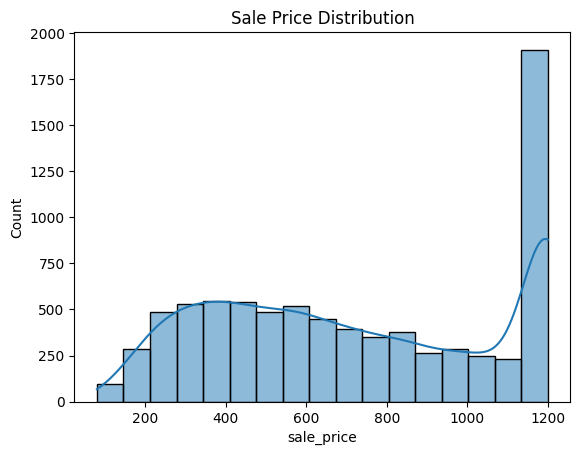

Skewness of sale_price: 0.07300029773629817


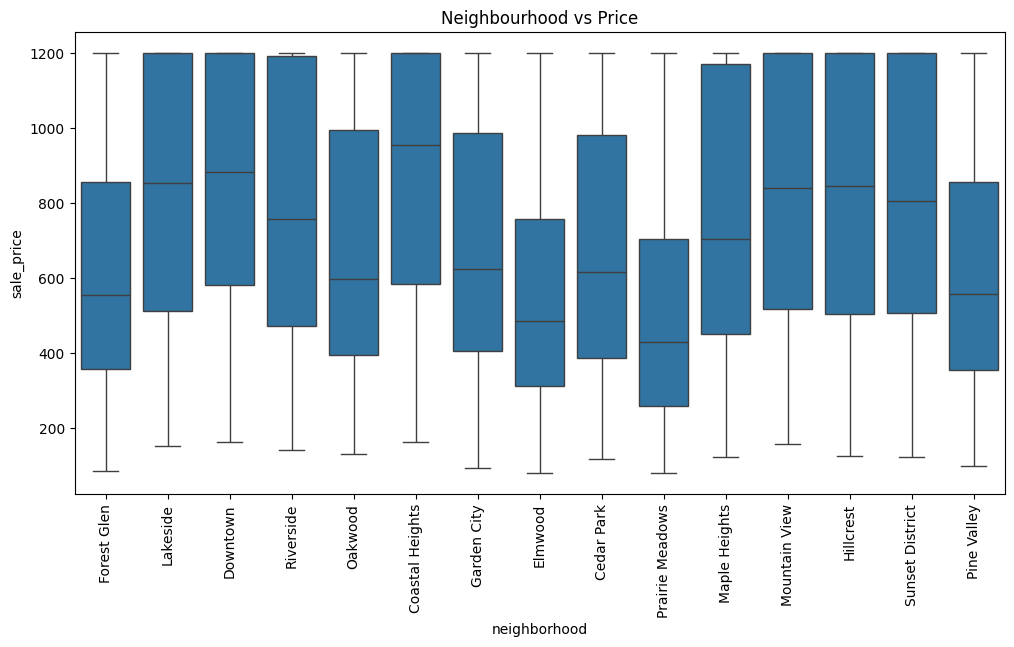

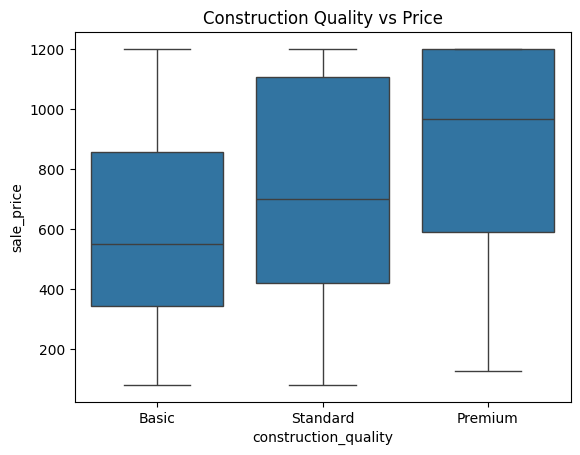

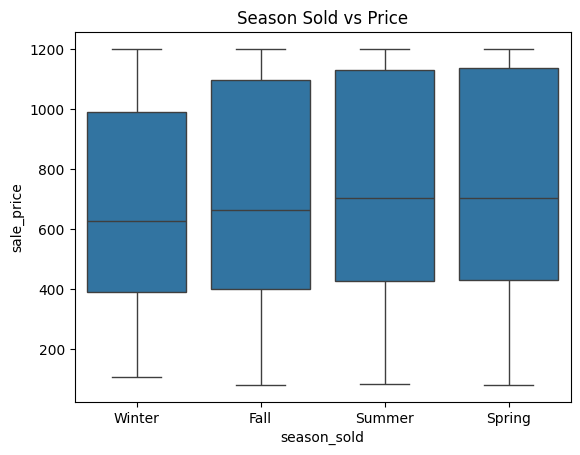

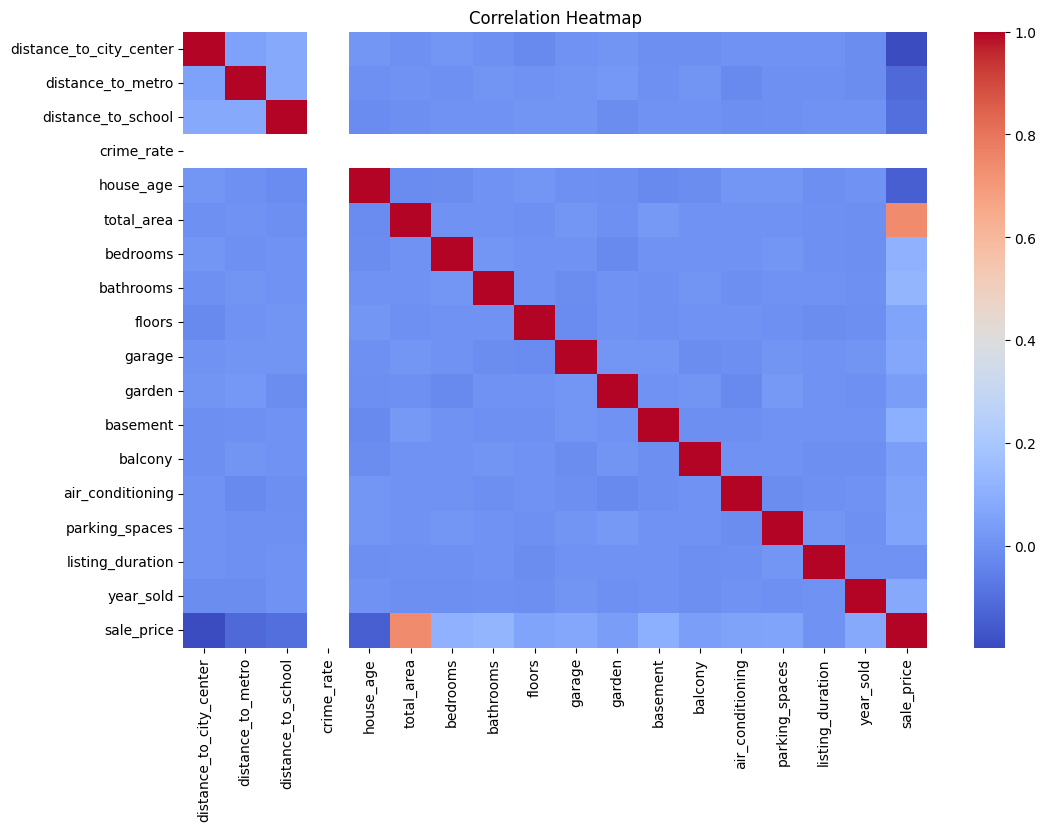

In [2]:
# Task 2: Exploratory Data Analysis

# Price distribution
sns.histplot(df["sale_price"], kde=True)
plt.title("Sale Price Distribution")
plt.show()

print("Skewness of sale_price:", df["sale_price"].skew())

# Location impact
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="neighborhood", y="sale_price")
plt.xticks(rotation=90)
plt.title("Neighbourhood vs Price")
plt.show()

# Quality impact
sns.boxplot(data=df, x="construction_quality", y="sale_price")
plt.title("Construction Quality vs Price")
plt.show()

# Market timing impact
sns.boxplot(data=df, x="season_sold", y="sale_price")
plt.title("Season Sold vs Price")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [3]:
# Task 3: Feature Engineering & Preprocessing

df_prep = df.copy()

# Drop property_id (not useful)
df_prep = df_prep.drop("property_id", axis=1)

# Encode categorical features
for col in df_prep.select_dtypes(include="object").columns:
    df_prep[col] = LabelEncoder().fit_transform(df_prep[col])

# Features & target
X = df_prep.drop("sale_price", axis=1)
y = df_prep["sale_price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape, " Test shape:", X_test.shape)


Training shape: (6400, 23)  Test shape: (1600, 23)


MAE: 152.11872755142022
MSE: 35959.09901019277
RMSE: 189.62884540647494
R2 Score: 0.7047570278672863


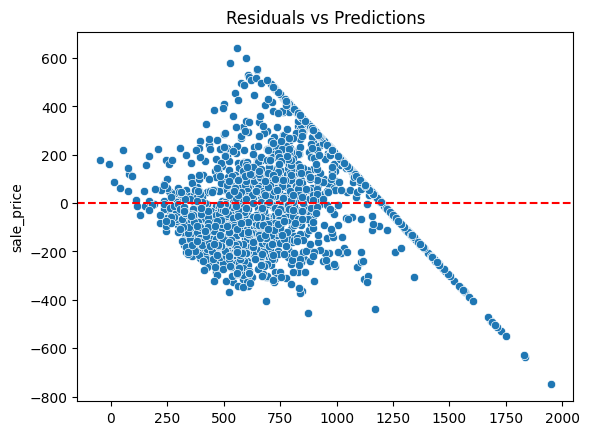

In [4]:
# Task 4 & 5: Model Training + Evaluation

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predictions")
plt.show()
